In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet 

In [2]:
#Import a csv file
df = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\esker_fabric_strikedip.csv')

df.head()

,Strike_raw,Strike,Dip,Magnetic_correction
0,205,193,45,12.4 W
1,270,258,32,NaN
2,212,200,30,NaN
3,210,198,10,NaN
4,235,223,38,NaN


In [3]:
#Create an array from the 'Strike' column of the dataframe
 
Strike = df.loc[:,'Strike']
Strike = np.hstack(Strike)
print(Strike)

[193 258 200 198 223 173 191 200 203 188 223 268 183 223 238 238 209 203
 200 208 165 177 196 168 128]


In [4]:
#Create an array from the 'Dip' column of the dataframe

Dip = df.loc[:,'Dip']
Dip = np.hstack(Dip)
print(Dip)

[45 32 30 10 38 30 14 12 20 22  5 28 25 22 47 62 34 47 20 14 43 32 24  5
  9]


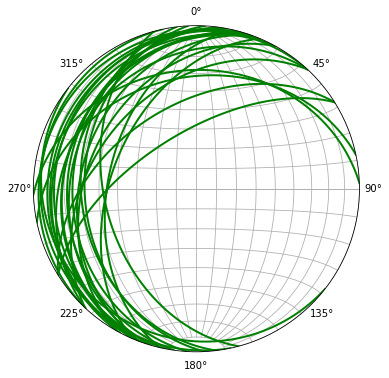

In [5]:
#Planes on a stereonet

# Create a stereonet with grid lines.
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 
ax.grid() 

#Plot planes 
#(These are AB-planes of imbricated esker clasts)
ax.plane(Strike, Dip, 'g-', linewidth=2)

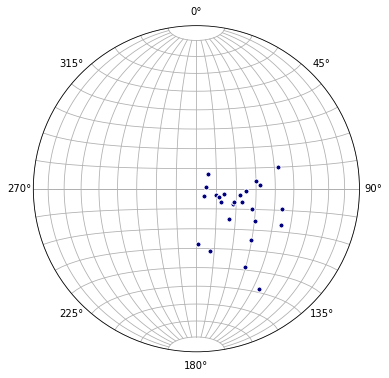

In [6]:
#Poles to AB-planes on a stereonet

# Create a stereonet with grid lines.
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 
ax.grid() 

#Plot poles
ax.pole(Strike, Dip, markersize=5, color='navy', markeredgecolor='white') 

Text(0.5, 1.1, 'Esker Clast Fabric Poles')

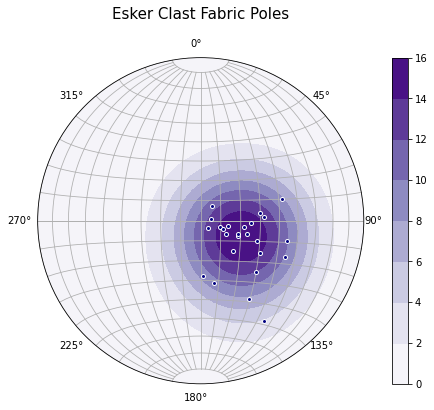

In [7]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 

#Plot poles
ax.pole(Strike, Dip, markersize=4, color='navy', markeredgecolor='white') 

# Create filled contours of the poles of the generated planes... 
# By default this uses a modified Kamb contouring technique with exponential 
# smoothing (See Vollmer, 1995) 
cax = ax.density_contourf(Strike, Dip, measurement='poles', cmap='Purples')
fig.colorbar(cax)
ax.grid() 
ax.set_title('Esker Clast Fabric Poles', y=1.10, fontsize=15)


In [8]:
# Convert the strike/dip of each plane to a plunge and bearing of its pole.
Plunge, Bearing = mplstereonet.stereonet_math.pole2plunge_bearing(Strike, Dip)

print("Plunge: ", Plunge)
print("Bearing: ", Bearing)

Plunge:  [45 58 60 80 52 60 76 78 70 68 85 62 65 68 43 28 56 43 70 76 47 58 66 85
 81]
Bearing:  [103 168 110 108 133  83 101 110 113  98 133 178  93 133 148 148 119 113
 110 118  75  87 106  78  38]


In [9]:
#Describe paleocurrent 

#Orientation tensors
plu, azi, vals = mplstereonet.eigenvectors(Plunge, Bearing, measurement='lines') 


#This returns 1-D arrays for plunge, azimuth, and normalized eigenvalues
print("1D array for plunge: ", plu)
print("1D array for azimuth: ", azi)
print("1D array for normalized eigenvalues: ", vals)

1D array for plunge:  [66.48557755 17.79165549 14.86570348]
1D array for azimuth:  [115.58857204 338.06786386 243.18146764]
1D array for normalized eigenvalues:  [0.91834868 0.05996745 0.04209203]


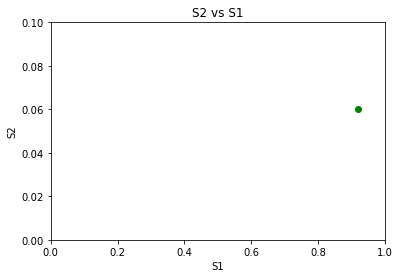

In [10]:
#Extract the normalized eigenvalues
S1=vals[0]
S2=vals[1]
S3=vals[2]

#Make a biplot of normalized eigenvalues
#S2 and S1
plt.scatter(S1,S2, c='green')
plt.title("S2 vs S1")
plt.xlabel('S1')
plt.ylabel('S2')
plt.xlim((0, 1.0))
plt.ylim((0, 0.1))

plt.show()

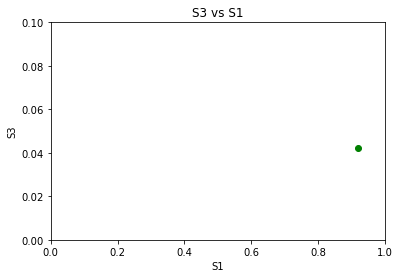

In [11]:
#Make a biplot of normalized eigenvalues
#S3 and S1
plt.scatter(S1,S3, c='green')
plt.title("S3 vs S1")
plt.xlabel('S1')
plt.ylabel('S3')
plt.xlim((0, 1.0))
plt.ylim((0, 0.1))

plt.show()

In [12]:
#Elongation index
E=1-(S2/S1).round(4)     
print("Elongation Index is ", E)

#Isotropy index
I=(S3/S1).round(4)        
print("Isotropy Index is ", I)

#A residual value to allow plotting the indices correctly on a ternary diagram
R=(1-(E+I)).round(4)    
print("Residual value is ", R)

Elongation Index is  0.9347
Isotropy Index is  0.0458
Residual value is  0.0195


In [13]:
df=pd.DataFrame(columns=['E','I', 'R'])

df.loc[0]=[E,I,R]

#To specify the Dtype is 'float'
df["E"]=df['E'].astype('float')      
df["I"]=df['I'].astype('float')
df["R"]=df['R'].astype('float')
print(df.dtypes)


#Extract just V1
V1_azi=azi[0]
V1_azi=V1_azi.round(1)
V1_dip=plu[0]
V1_dip=V1_dip.round(1)
print("V1 is", V1_dip, "\u2192", V1_azi)

E    float64
I    float64
R    float64
dtype: object
V1 is 66.5 → 115.6


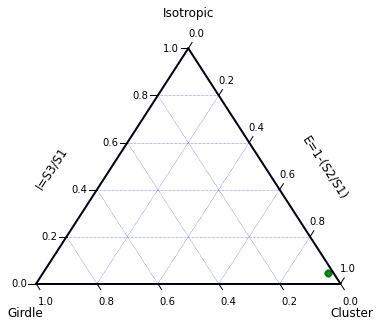

In [14]:
#Let's plot the results on a ternary diagram!
import ternary as te    

scale = 1.0
figure, fabric = te.figure(scale=scale)
figure.set_size_inches(6,5)

#PLot the data
fabric.scatter(df[['E','I','R']].values, linewidth=6., marker='D', color='green', s=3)
    
# Draw Boundary and Gridlines
fabric.boundary(linewidth=2.0)
fabric.gridlines(color="blue", multiple=0.2)
    
# Set Axis labels
fontsize = 12
offset = 0.2
fabric.left_axis_label("I=S3/S1", fontsize=fontsize, offset=0.2)
fabric.right_axis_label("E=1-(S2/S1)", fontsize=fontsize, offset=0.2)
fabric.top_corner_label("Isotropic", fontsize=fontsize, offset=0.25)
fabric.right_corner_label("Cluster", fontsize=fontsize, offset=-0.05)
fabric.left_corner_label("Girdle", fontsize=fontsize, offset=-0.05)

#This is to configure the style of the axes and ticks 
#and specify their orientation/sense
fabric.ticks(axis='lbr', multiple=0.2, linewidth=1, offset=0.025, tick_formats="%.1f", clockwise=True)
fabric.get_axes().axis('off')
fabric.clear_matplotlib_ticks()

fabric.show()

Plunge and bearing of V1 pole:  66.5 ° → 115.6 °
Implied subglacial paleocurrent towards  115.6 °


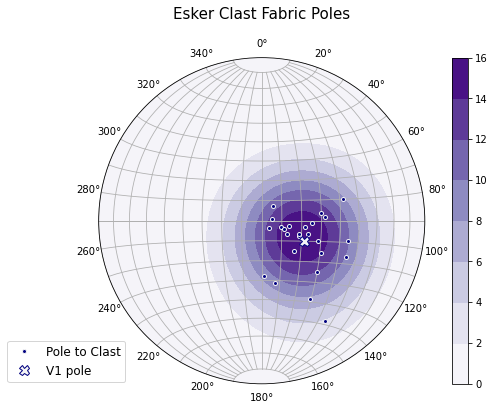

In [15]:
#Stereonet vith V1

fig = plt.figure(figsize=(9.7, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 

#Plot poles
ax.pole(Strike, Dip, markersize=4, color='navy', markeredgecolor='whitesmoke', label="Pole to Clast") 

# Create filled contours of the poles of the generated planes... 
# By default this uses a modified Kamb contouring technique with exponential 
# smoothing (See Vollmer, 1995) 
cax = ax.density_contourf(Strike, Dip, measurement='poles', cmap='Purples')
fig.colorbar(cax)
ax.grid()
ax.set_azimuth_ticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
                     220, 240, 260, 280, 300, 320, 340])
ax.set_title('Esker Clast Fabric Poles', y=1.10, fontsize=15)

#Marker on plot
plunge=V1_dip
bearing=V1_azi
ax.line(plunge, bearing, 'X', color='whitesmoke', markersize=10, markeredgecolor='navy', label="V1 pole")

#Adding text to the plot...
#COLOR = 'whitesmoke'
#plt.rcParams['text.color'] = COLOR
#plt.text(-1.5, -0.2, "V1")

#This is display the legend without overlapping the stereonet
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.15), fontsize=12)

print("Plunge and bearing of V1 pole: ", V1_dip, "\u00b0", "\u2192", V1_azi, "\u00b0")
print("Implied subglacial paleocurrent towards ", V1_azi, "\u00b0")

#plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Esker_fabric_poles_V1.png', format='png')

In [16]:
# Convert the plunge and bearing of V1 pole to Strike and Dip of V1 plane
Strike_V1, Dip_V1 = mplstereonet.stereonet_math.plunge_bearing2pole(V1_dip, V1_azi)

print("Strike of V1 plane: ", Strike_V1)
print("Dip of V1 plane: ", Dip_V1)

Strike of V1 plane:  [205.6]
Dip of V1 plane:  [23.5]


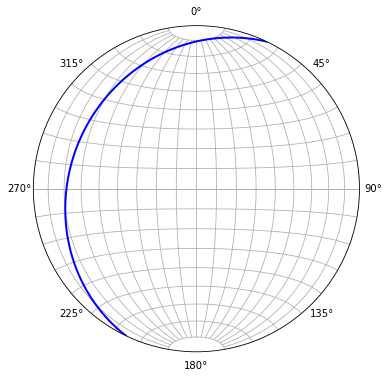

In [17]:
#V1 Plane on a stereonet

# Create a stereonet with grid lines.
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 
ax.grid() 

#Plot V1 plane
ax.plane(Strike_V1, Dip_V1, 'blue', linewidth=2)

#plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Esker_V1_plane.png', format='png')

In [18]:
#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii
import seaborn as sns

print("Color Brewer Palettes:")

pal = sns.color_palette("Blues", 5)
print("Blues: ", pal.as_hex())

Color Brewer Palettes:
Blues:  ['#d6e6f4', '#abd0e6', '#6aaed6', '#3787c0', '#105ba4']


Strike of V1 plane:  [205.6]
Dip of V1 plane:  [23.5]
Plunge and bearing of V1 pole:  66.5 ° → 115.6 °
Implied subglacial paleocurrent towards  115.6 °


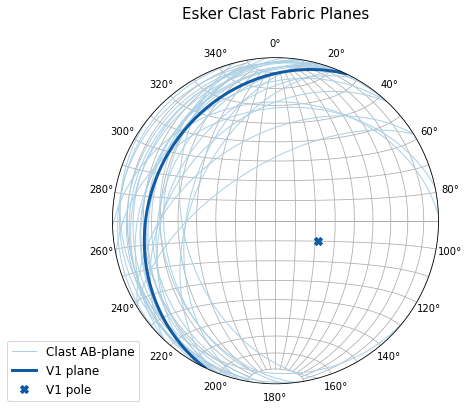

In [19]:
#V1 Plane and Pole on a stereonet

# Create a stereonet with grid lines.
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 
ax.grid() 
ax.set_azimuth_ticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
                     220, 240, 260, 280, 300, 320, 340])
ax.set_title('Esker Clast Fabric Planes', y=1.1, fontsize=15)

#Plot all planes
ax.plane(Strike, Dip, '#abd0e6', linewidth=1, label="Clast AB-plane")

#Plot V1 plane
ax.plane(Strike_V1, Dip_V1, '#105ba4', linewidth=3, label="V1 plane")

#Marker on plot
plunge=V1_dip
bearing=V1_azi
ax.line(plunge, bearing, 'X', color='#105ba4', markersize=8, label="V1 pole")

#Remove duplicate legend labels by making a dictionary
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(0.1, 0.15), fontsize=12)


print("Strike of V1 plane: ", Strike_V1)
print("Dip of V1 plane: ", Dip_V1)
print("Plunge and bearing of V1 pole: ", V1_dip, "\u00b0", "\u2192", V1_azi, "\u00b0")
print("Implied subglacial paleocurrent towards ", V1_azi, "\u00b0")

#plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Esker_fabric_planes_V1.png', format='png')

In [20]:
pal = sns.color_palette("Blues", 10)
print("Blues: ", pal.as_hex())

Blues:  ['#e5eff9', '#d3e4f3', '#bfd8ed', '#a1cbe2', '#7db8da', '#5ca4d0', '#3f8fc5', '#2676b8', '#135fa7', '#08488e']


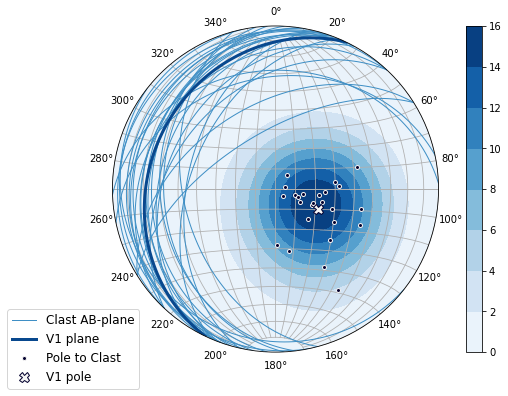

In [21]:
#Playing with colours
#Stereonet vith V1

fig = plt.figure(figsize=(9.7, 6)) 
ax = fig.add_subplot(111, projection='stereonet') 


# Create filled contours of the poles of the generated planes... 
# By default this uses a modified Kamb contouring technique with exponential 
# smoothing (See Vollmer, 1995) 
cax = ax.density_contourf(Strike, Dip, measurement='poles', cmap='Blues')
fig.colorbar(cax)
ax.grid()
ax.set_azimuth_ticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
                     220, 240, 260, 280, 300, 320, 340])



#Markers on plot

#Plot all planes
ax.plane(Strike, Dip, '#3f8fc5', linewidth=1, label="Clast AB-plane")
ax.plane(Strike_V1, Dip_V1, '#08488e', linewidth=3, label="V1 plane")

#Plot poles
ax.pole(Strike, Dip, markersize=4, color='#03002e', markeredgecolor='whitesmoke', label="Pole to Clast")

plunge=V1_dip
bearing=V1_azi
ax.line(plunge, bearing, 'X', color='whitesmoke', markersize=10, markeredgecolor='#03002e', label="V1 pole")


#Remove duplicate legend labels by making a dictionary
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(0.1, 0.15), fontsize=12)

#plt.savefig('esker_fabric', transparent=False, bbox_inches='tight')


#print("Plunge and bearing of V1 pole: ", V1_dip, "\u00b0", "\u2192", V1_azi, "\u00b0")
#print("Implied subglacial paleocurrent towards ", V1_azi, "\u00b0")